# Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Interpretation
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot

In [3]:
# 소수점 4자리까지 보이도록 설정
pd.set_option('display.float_format', '{:,.4f}'.format)

# EDA

## 데이터 불러오기

In [4]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [5]:
df = pd.read_csv('house_price.csv')

# 서울시 데이터만 추출
df = df[df.city == '서울특별시']
df

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184014,1196844,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.7200,2011,201711,11~20,9,53000
1184015,1196846,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.8700,2009,201711,21~30,12,53000
1184016,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.7400,2009,201711,21~30,3,56500
1184017,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.7400,2009,201711,21~30,9,55500


In [6]:
# 데이터셋이 너무 커서 1/20로 줄인다
df = df.sample(frac=0.05, random_state=1) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37114 entries, 209532 to 552289
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          37114 non-null  int64  
 1   apartment_id            37114 non-null  int64  
 2   city                    37114 non-null  object 
 3   dong                    37114 non-null  object 
 4   jibun                   37114 non-null  object 
 5   apt                     37114 non-null  object 
 6   addr_kr                 37114 non-null  object 
 7   exclusive_use_area      37114 non-null  float64
 8   year_of_completion      37114 non-null  int64  
 9   transaction_year_month  37114 non-null  int64  
 10  transaction_date        37114 non-null  object 
 11  floor                   37114 non-null  int64  
 12  transaction_real_price  37114 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 4.0+ MB


## 결측치-중복치 처리

In [8]:
# 컬럼별 결측치수 확인
df.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [9]:
# 결측치 데이터 출력
df[df.isnull().any(axis=1)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price


In [10]:
# 결측치 제거
df.dropna(inplace=True)

# 처리 결과 확인
null_result = df.isnull().sum()

if null_result.sum() == 0:
  print("결측치가 모두 처리되었습니다")
else :
  print("결측치를 다시 확인하세요")

결측치가 모두 처리되었습니다


In [11]:
# 중복된 데이터수 확인
df.duplicated().sum()

0

In [12]:
# 중복치 삭제 및 확인
df.drop_duplicates(inplace=True)

# 처리 결과 확인
duplicate_result = df.duplicated().sum()

if duplicate_result.sum() == 0:
  print("중복치가 모두 처리되었습니다")
else :
  print("중복치를 다시 확인하세요")

중복치가 모두 처리되었습니다


In [13]:
# index reset
df.reset_index(drop=True, inplace=True)
df.shape

(37114, 13)

## 특성 공학

In [14]:
# 카디널리티 확인
df.nunique()

transaction_id            37114
apartment_id               5044
city                          1
dong                        303
jibun                      3576
apt                        4181
addr_kr                    5044
exclusive_use_area         5385
year_of_completion           51
transaction_year_month      119
transaction_date              6
floor                        59
transaction_real_price     2558
dtype: int64

In [15]:
def eda(df):

  # 거래 연도-달 컬럼 분리

  year_list = []
  month_list = []

  for row in df['transaction_year_month']:
    year = str(row)[:4]
    year_list.append(year)

    month = str(row)[4:]
    month_list.append(month)
  
  df_eda = df.copy()

  df_eda['trans_year'] = year_list
  df_eda['trans_month'] = month_list

  df_eda['trans_year'] = df_eda['trans_year'].astype(int)
  df_eda['trans_month'] = df_eda['trans_month'].astype(int)
 
  # 필요없는 컬럼 삭제
  remove_cols = ['city', 'transaction_id', 'apt', 'addr_kr', 'jibun', 'transaction_year_month']
  df_eda = df_eda.drop(columns=remove_cols)

  # 컬럼명 변경
  df_eda = df_eda.rename(columns={'apartment_id':'apt_id', 'exclusive_use_area':'area', 'transaction_real_price':'price', 'transaction_date':'trans_date'})

  # trans_date 컬럼 중간값으로 mapping
  date_map = {'1~10':5, '11~20':15, '21~28':25, '21~29':25, '21~30':25, '21~31':25}
  df_eda['trans_date'] = df_eda['trans_date'].map(date_map)

  print(df_eda.info())
  return df_eda

df_eda = eda(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37114 entries, 0 to 37113
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   apt_id              37114 non-null  int64  
 1   dong                37114 non-null  object 
 2   area                37114 non-null  float64
 3   year_of_completion  37114 non-null  int64  
 4   trans_date          37114 non-null  int64  
 5   floor               37114 non-null  int64  
 6   price               37114 non-null  int64  
 7   trans_year          37114 non-null  int32  
 8   trans_month         37114 non-null  int32  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 2.3+ MB
None


In [16]:
# 확인
df_eda

,apt_id,dong,area,year_of_completion,trans_date,floor,price,trans_year,trans_month
0,3989,월계동,84.9850,2006,25,10,40400,2013,12
1,1111,봉천동,25.8600,1998,5,18,7500,2010,3
2,645,잠원동,84.5300,1987,5,9,79300,2011,1
3,375,북가좌동,84.9400,2012,15,35,56500,2014,12
4,1486,염창동,59.9100,1999,15,11,29000,2014,2
...,...,...,...,...,...,...,...,...,...
37109,9231,오류동,36.6900,2005,25,13,16100,2014,8
37110,12218,광장동,147.2300,2004,15,14,134000,2017,10
37111,6979,장지동,84.9800,2008,25,7,57450,2015,3
37112,4145,내발산동,59.7600,2008,5,5,16655,2009,3


## 데이터셋 분리 (train / val / test)

In [17]:
# target / feature 분리

target = 'price'
x = df_eda.drop(target, axis=1)
y = df_eda[target]

print(f'x shape : {x.shape}')
print(f'y shape : {y.shape}')


x shape : (37114, 8)
y shape : (37114,)


In [18]:
# train / val / test 분리

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

print(f'train data : x{x_train.shape}, y{y_train.shape}')
print(f'val data : x{x_val.shape}, y{y_val.shape}')
print(f'test data : x{x_test.shape}, y{y_test.shape}')

train data : x(23752, 8), y(23752,)
val data : x(5939, 8), y(5939,)
test data : x(7423, 8), y(7423,)


# Modeling

## Model 선택

In [19]:
def eval_models(y_true, y_pred) :
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)
    
    return mae, r2

In [20]:
def train_val_score(model):
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)

    model_eval = pd.DataFrame(index=['MAE','R2'], columns=['Train', 'Val'])
    model_eval['Train'] = eval_models(y_train, y_train_pred)
    model_eval['Val'] = eval_models(y_val, y_val_pred)
    
    display(model_eval)
    return model_eval

In [21]:
# 기준모델
base = y_train.mean()
baseline = [base] * len(y_train)

# 평가
print(eval_models(y_train, baseline))

# 모델별 score
eval_table = pd.DataFrame(index=['MAE', 'R2'], columns=['Baseline', 'DecisionTree', 'RandomForest'])
eval_table['Baseline'] = eval_models(y_train, baseline)
eval_table

(22024.564, 0.0)


,Baseline,DecisionTree,RandomForest
MAE,"22,024.5640",NaN,NaN
R2,0.0000,NaN,NaN


In [22]:
# 특성과 타겟간의 선형적 관계가 없어 학습에 무리가 있다고 판단

'''

# LinearRegression

linear = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LinearRegression())

linear.fit(x_train, y_train)

# train-val score
train_val_score(linear)

# 모델별 score
y_val_pred = linear.predict(x_val)
eval_table['Linear'] = eval_models(y_val, y_val_pred)
eval_table

'''

"\n\n# LinearRegression\n\nlinear = make_pipeline(\n    OneHotEncoder(),\n    StandardScaler(),\n    LinearRegression())\n\nlinear.fit(x_train, y_train)\n\n# train-val score\ntrain_val_score(linear)\n\n# 모델별 score\ny_val_pred = linear.predict(x_val)\neval_table['Linear'] = eval_models(y_val, y_val_pred)\neval_table\n\n"

In [23]:
'''

# PolynomialRegression

# polynomial 함수 지정
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(
        OneHotEncoder(),
        StandardScaler(),
        PolynomialFeatures(degree), 
        LinearRegression(**kwargs))

polynomial = PolynomialRegression()
polynomial.fit(x_train, y_train)

# train-val score
train_val_score(polynomial)

# 모델별 score
y_val_pred = polynomial.predict(x_val)
eval_table['Polynomial'] = eval_models(y_val, y_val_pred)
eval_table

'''

"\n\n# PolynomialRegression\n\n# polynomial 함수 지정\ndef PolynomialRegression(degree=2, **kwargs):\n    return make_pipeline(\n        OneHotEncoder(),\n        StandardScaler(),\n        PolynomialFeatures(degree), \n        LinearRegression(**kwargs))\n\npolynomial = PolynomialRegression()\npolynomial.fit(x_train, y_train)\n\n# train-val score\ntrain_val_score(polynomial)\n\n# 모델별 score\ny_val_pred = polynomial.predict(x_val)\neval_table['Polynomial'] = eval_models(y_val, y_val_pred)\neval_table\n\n"

In [24]:
# DecisionTreeRegression

decisiontree = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeRegressor(random_state = 1))

decisiontree.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['dong'],
                                mapping=[{'col': 'dong',
                                          'data_type': dtype('O'),
                                          'mapping': 신림동        1
잠실동        2
대치동        3
중계동        4
수서동        5
        ... 
충신동      292
수송동      293
연건동      294
청파동1가    295
NaN       -2
Length: 296, dtype: int64}])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=1))])

In [25]:
# train-val score
train_val_score(decisiontree)

# 모델별 score
y_val_pred = decisiontree.predict(x_val)
eval_table['DecisionTree'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
MAE,1.6440,"8,767.9410"
R2,1.0000,0.7388


,Baseline,DecisionTree,RandomForest
MAE,"22,024.5640","8,767.9410",NaN
R2,0.0000,0.7388,NaN


In [27]:
# RandomForestRegression

randomforest = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(random_state = 1))

randomforest.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['dong'],
                                mapping=[{'col': 'dong',
                                          'data_type': dtype('O'),
                                          'mapping': 신림동        1
잠실동        2
대치동        3
중계동        4
수서동        5
        ... 
충신동      292
수송동      293
연건동      294
청파동1가    295
NaN       -2
Length: 296, dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

In [28]:
# RandomForestRegression

randomforest = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(random_state = 1))

randomforest.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['dong'],
                                mapping=[{'col': 'dong',
                                          'data_type': dtype('O'),
                                          'mapping': 신림동        1
잠실동        2
대치동        3
중계동        4
수서동        5
        ... 
충신동      292
수송동      293
연건동      294
청파동1가    295
NaN       -2
Length: 296, dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

In [29]:
# train-val score
train_val_score(randomforest)

# 모델별 score
y_val_pred = randomforest.predict(x_val)
eval_table['RandomForest'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
MAE,"2,544.2310","6,900.0100"
R2,0.9806,0.8651


,Baseline,DecisionTree,RandomForest
MAE,"22,024.5640","8,767.9410","6,900.0100"
R2,0.0000,0.7388,0.8651


In [30]:
from xgboost import XGBRegressor

xgb = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state = 1))

xgb.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['dong'],
                                mapping=[{'col': 'dong',
                                          'data_type': dtype('O'),
                                          'mapping': 신림동        1
잠실동        2
대치동        3
중계동        4
수서동        5
        ... 
충신동      292
수송동      293
연건동      294
청파동1가    295
NaN       -2
Length: 296, dtype: int64}])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stop...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=1, ...))])

In [31]:
# train-val score
train_val_score(xgb)

# 모델별 score
y_val_pred = xgb.predict(x_val)
eval_table['XGB'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
MAE,"4,250.3330","5,921.6410"
R2,0.9672,0.9060


,Baseline,DecisionTree,RandomForest,XGB
MAE,"22,024.5640","8,767.9410","6,900.0100","5,921.6410"
R2,0.0000,0.7388,0.8651,0.9060


## Tuning

In [32]:
# xgboost로 결정

# 기본 모델
model = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state = 1))

model.fit(x_train, y_train)

# 하이퍼파라미터 튜닝 결과 비교
model_tuning = pd.DataFrame(index = ['MAE', 'R2'])
y_val_pred = model.predict(x_val)
model_tuning['Basic'] = eval_models(y_val, y_val_pred)
model_tuning

,Basic
MAE,"5,921.6410"
R2,0.9060


In [33]:
# exp1

model = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state = 1,
                max_depth=7))

model.fit(x_train, y_train)

# 하이퍼파라미터 튜닝 결과 비교
y_val_pred = model.predict(x_val)
model_tuning['Exp1'] = eval_models(y_val, y_val_pred)
model_tuning

,Basic,Exp1
MAE,"5,921.6410","5,461.6480"
R2,0.9060,0.9133


In [34]:
# exp2

model = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state = 1,
                 learning_rate = 0.3,
                 colsample_bytree = 0.8,
                 max_depth=7))

model.fit(x_train, y_train)

# 하이퍼파라미터 튜닝 결과 비교
y_val_pred = model.predict(x_val)
model_tuning['Exp2'] = eval_models(y_val, y_val_pred)
model_tuning

,Basic,Exp1,Exp2
MAE,"5,921.6410","5,461.6480","5,443.7690"
R2,0.9060,0.9133,0.9174


In [35]:
# exp3

model = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state = 1,
                 learning_rate = 0.3,
                 colsample_bytree = 0.8,
                 min_child_weight = 5,
                 max_depth=7,
                 n_jobs=-1
                 ))

model.fit(x_train, y_train)

# 하이퍼파라미터 튜닝 결과 비교
y_val_pred = model.predict(x_val)
model_tuning['Exp3'] = eval_models(y_val, y_val_pred)
model_tuning

,Basic,Exp1,Exp2,Exp3
MAE,"5,921.6410","5,461.6480","5,443.7690","5,605.2260"
R2,0.9060,0.9133,0.9174,0.9181


In [36]:
# exp4 
# early stopping을 이용해 n_estimators 최적값 찾기

x_train_encoded = model[0].fit_transform(x_train)
x_val_encoded = model[0].transform(x_val)

model = XGBRegressor(random_state = 1,
                 learning_rate = 0.3,
                 colsample_bytree = 0.8,
                 min_child_weight = 5,
                 max_depth=7,
                 eval_metric="mae",
                 n_estimators=10000)

watchlist = [(x_train_encoded, y_train), (x_val_encoded, y_val)]


In [37]:

model.fit(
    x_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50)

[0]	validation_0-mae:34496.68921	validation_1-mae:35341.58075
[1]	validation_0-mae:25055.58743	validation_1-mae:25941.44588
[2]	validation_0-mae:18260.76837	validation_1-mae:18981.62960
[3]	validation_0-mae:14193.05686	validation_1-mae:14813.92262
[4]	validation_0-mae:11930.26369	validation_1-mae:12563.64439
[5]	validation_0-mae:10966.67770	validation_1-mae:11672.18771
[6]	validation_0-mae:10119.33144	validation_1-mae:10889.59926
[7]	validation_0-mae:9425.06443	validation_1-mae:10247.32257
[8]	validation_0-mae:9109.71339	validation_1-mae:9952.73387
[9]	validation_0-mae:8861.70702	validation_1-mae:9753.30233
[10]	validation_0-mae:8660.53219	validation_1-mae:9574.20552
[11]	validation_0-mae:8524.77253	validation_1-mae:9475.42961
[12]	validation_0-mae:8371.96016	validation_1-mae:9352.51935
[13]	validation_0-mae:8241.02725	validation_1-mae:9232.79755
[14]	validation_0-mae:8072.71462	validation_1-mae:9101.55712
[15]	validation_0-mae:7866.49877	validation_1-mae:8886.99907
[16]	validation_0-m

[134]	validation_0-mae:3191.79395	validation_1-mae:5260.19279
[135]	validation_0-mae:3179.98942	validation_1-mae:5251.36500
[136]	validation_0-mae:3167.40151	validation_1-mae:5242.66600
[137]	validation_0-mae:3160.59568	validation_1-mae:5239.85795
[138]	validation_0-mae:3140.03987	validation_1-mae:5221.41257
[139]	validation_0-mae:3131.50139	validation_1-mae:5211.86840
[140]	validation_0-mae:3121.21672	validation_1-mae:5206.15373
[141]	validation_0-mae:3108.59526	validation_1-mae:5200.81042
[142]	validation_0-mae:3103.07744	validation_1-mae:5199.15541
[143]	validation_0-mae:3083.79936	validation_1-mae:5190.69735
[144]	validation_0-mae:3078.77608	validation_1-mae:5190.25058
[145]	validation_0-mae:3067.68441	validation_1-mae:5183.82236
[146]	validation_0-mae:3066.12531	validation_1-mae:5184.67284
[147]	validation_0-mae:3065.48971	validation_1-mae:5184.79746
[148]	validation_0-mae:3059.40795	validation_1-mae:5181.39484
[149]	validation_0-mae:3054.68390	validation_1-mae:5181.54055
[150]	va

[267]	validation_0-mae:2184.19982	validation_1-mae:4800.17069
[268]	validation_0-mae:2183.75484	validation_1-mae:4800.44784
[269]	validation_0-mae:2174.22828	validation_1-mae:4799.93880
[270]	validation_0-mae:2160.75040	validation_1-mae:4793.57072
[271]	validation_0-mae:2157.83270	validation_1-mae:4793.29861
[272]	validation_0-mae:2151.26898	validation_1-mae:4790.37062
[273]	validation_0-mae:2149.30527	validation_1-mae:4790.37228
[274]	validation_0-mae:2148.47583	validation_1-mae:4790.49736
[275]	validation_0-mae:2147.31659	validation_1-mae:4789.99752
[276]	validation_0-mae:2144.55924	validation_1-mae:4790.01480
[277]	validation_0-mae:2138.75847	validation_1-mae:4787.44988
[278]	validation_0-mae:2137.78684	validation_1-mae:4787.20998
[279]	validation_0-mae:2131.16119	validation_1-mae:4785.26331
[280]	validation_0-mae:2121.26500	validation_1-mae:4785.19444
[281]	validation_0-mae:2116.04364	validation_1-mae:4784.92241
[282]	validation_0-mae:2113.18245	validation_1-mae:4783.86195
[283]	va

[400]	validation_0-mae:1667.70471	validation_1-mae:4650.35655
[401]	validation_0-mae:1663.85496	validation_1-mae:4647.66389
[402]	validation_0-mae:1659.57491	validation_1-mae:4646.96831
[403]	validation_0-mae:1658.46636	validation_1-mae:4646.73793
[404]	validation_0-mae:1654.20700	validation_1-mae:4645.07374
[405]	validation_0-mae:1647.54139	validation_1-mae:4645.87842
[406]	validation_0-mae:1646.10979	validation_1-mae:4645.79748
[407]	validation_0-mae:1638.53472	validation_1-mae:4644.73802
[408]	validation_0-mae:1634.51250	validation_1-mae:4643.54911
[409]	validation_0-mae:1630.90877	validation_1-mae:4642.65114
[410]	validation_0-mae:1629.67826	validation_1-mae:4643.70799
[411]	validation_0-mae:1626.88747	validation_1-mae:4643.72507
[412]	validation_0-mae:1620.93415	validation_1-mae:4640.75105
[413]	validation_0-mae:1616.78617	validation_1-mae:4637.87871
[414]	validation_0-mae:1613.19051	validation_1-mae:4635.44233
[415]	validation_0-mae:1611.75024	validation_1-mae:4634.92054
[416]	va

[533]	validation_0-mae:1316.79119	validation_1-mae:4578.88334
[534]	validation_0-mae:1313.01459	validation_1-mae:4578.86980
[535]	validation_0-mae:1311.73409	validation_1-mae:4577.80451
[536]	validation_0-mae:1309.75217	validation_1-mae:4577.83764
[537]	validation_0-mae:1307.97447	validation_1-mae:4577.31330
[538]	validation_0-mae:1305.83642	validation_1-mae:4575.83165
[539]	validation_0-mae:1303.15134	validation_1-mae:4574.85529
[540]	validation_0-mae:1301.50984	validation_1-mae:4574.10018
[541]	validation_0-mae:1299.45320	validation_1-mae:4573.63304
[542]	validation_0-mae:1296.47687	validation_1-mae:4573.20630
[543]	validation_0-mae:1295.57673	validation_1-mae:4572.83118
[544]	validation_0-mae:1292.40709	validation_1-mae:4572.64423
[545]	validation_0-mae:1291.76935	validation_1-mae:4572.87310
[546]	validation_0-mae:1289.79612	validation_1-mae:4572.21240
[547]	validation_0-mae:1289.41697	validation_1-mae:4572.38706
[548]	validation_0-mae:1286.00584	validation_1-mae:4572.14868
[549]	va

[666]	validation_0-mae:1095.15664	validation_1-mae:4545.08087
[667]	validation_0-mae:1093.57966	validation_1-mae:4545.29882
[668]	validation_0-mae:1092.93705	validation_1-mae:4544.84981
[669]	validation_0-mae:1092.80846	validation_1-mae:4544.76587
[670]	validation_0-mae:1089.35427	validation_1-mae:4544.00306
[671]	validation_0-mae:1088.15669	validation_1-mae:4543.51379
[672]	validation_0-mae:1085.67326	validation_1-mae:4543.66962
[673]	validation_0-mae:1081.58198	validation_1-mae:4542.31346
[674]	validation_0-mae:1080.80456	validation_1-mae:4542.28904
[675]	validation_0-mae:1080.06716	validation_1-mae:4542.29877
[676]	validation_0-mae:1078.11610	validation_1-mae:4541.14270
[677]	validation_0-mae:1077.40051	validation_1-mae:4541.34578
[678]	validation_0-mae:1076.10804	validation_1-mae:4541.03343
[679]	validation_0-mae:1071.78864	validation_1-mae:4540.96438
[680]	validation_0-mae:1067.80141	validation_1-mae:4541.05536
[681]	validation_0-mae:1065.93486	validation_1-mae:4540.59351
[682]	va

[800]	validation_0-mae:896.37922	validation_1-mae:4528.33223
[801]	validation_0-mae:895.48600	validation_1-mae:4528.21138
[802]	validation_0-mae:894.83347	validation_1-mae:4528.11105
[803]	validation_0-mae:893.03047	validation_1-mae:4527.12960
[804]	validation_0-mae:891.99000	validation_1-mae:4527.11470
[805]	validation_0-mae:891.34788	validation_1-mae:4526.93594
[806]	validation_0-mae:889.65006	validation_1-mae:4527.52879
[807]	validation_0-mae:889.21769	validation_1-mae:4527.67616
[808]	validation_0-mae:887.89112	validation_1-mae:4527.55789
[809]	validation_0-mae:886.81630	validation_1-mae:4527.33384
[810]	validation_0-mae:885.57301	validation_1-mae:4526.92490
[811]	validation_0-mae:885.16958	validation_1-mae:4526.68760
[812]	validation_0-mae:883.58270	validation_1-mae:4526.68557
[813]	validation_0-mae:882.23662	validation_1-mae:4526.52661
[814]	validation_0-mae:881.83376	validation_1-mae:4526.41169
[815]	validation_0-mae:881.17538	validation_1-mae:4526.21358
[816]	validation_0-mae:8

[935]	validation_0-mae:768.84753	validation_1-mae:4515.70368
[936]	validation_0-mae:767.87559	validation_1-mae:4515.04009
[937]	validation_0-mae:767.01669	validation_1-mae:4515.13052
[938]	validation_0-mae:766.39455	validation_1-mae:4515.03676
[939]	validation_0-mae:764.40368	validation_1-mae:4515.28448
[940]	validation_0-mae:762.71239	validation_1-mae:4515.51525
[941]	validation_0-mae:761.40880	validation_1-mae:4515.29568
[942]	validation_0-mae:761.11248	validation_1-mae:4515.52569
[943]	validation_0-mae:760.05111	validation_1-mae:4515.07672
[944]	validation_0-mae:758.69932	validation_1-mae:4515.00070
[945]	validation_0-mae:756.51133	validation_1-mae:4514.30879
[946]	validation_0-mae:755.68675	validation_1-mae:4514.48016
[947]	validation_0-mae:754.29006	validation_1-mae:4514.66217
[948]	validation_0-mae:752.58983	validation_1-mae:4514.96209
[949]	validation_0-mae:751.87947	validation_1-mae:4514.70907
[950]	validation_0-mae:750.60987	validation_1-mae:4514.88450
[951]	validation_0-mae:7

[1069]	validation_0-mae:656.90015	validation_1-mae:4507.15885
[1070]	validation_0-mae:656.72394	validation_1-mae:4507.34793
[1071]	validation_0-mae:656.48923	validation_1-mae:4507.30443
[1072]	validation_0-mae:655.92978	validation_1-mae:4507.17027
[1073]	validation_0-mae:655.15812	validation_1-mae:4507.00756
[1074]	validation_0-mae:653.80707	validation_1-mae:4506.58661
[1075]	validation_0-mae:653.41629	validation_1-mae:4506.66559
[1076]	validation_0-mae:653.09667	validation_1-mae:4506.67655
[1077]	validation_0-mae:652.61541	validation_1-mae:4506.51716
[1078]	validation_0-mae:651.68509	validation_1-mae:4505.95738
[1079]	validation_0-mae:650.21902	validation_1-mae:4506.27802
[1080]	validation_0-mae:649.18698	validation_1-mae:4506.53973
[1081]	validation_0-mae:649.08841	validation_1-mae:4506.60904
[1082]	validation_0-mae:648.79158	validation_1-mae:4506.48104
[1083]	validation_0-mae:648.47950	validation_1-mae:4506.50359
[1084]	validation_0-mae:646.96061	validation_1-mae:4506.11173
[1085]	v

[1202]	validation_0-mae:562.58031	validation_1-mae:4502.24468
[1203]	validation_0-mae:562.39419	validation_1-mae:4502.30817
[1204]	validation_0-mae:562.00603	validation_1-mae:4502.33649
[1205]	validation_0-mae:561.72329	validation_1-mae:4502.25797
[1206]	validation_0-mae:560.93333	validation_1-mae:4502.23514
[1207]	validation_0-mae:560.81064	validation_1-mae:4502.26104
[1208]	validation_0-mae:559.16461	validation_1-mae:4501.98581
[1209]	validation_0-mae:558.38272	validation_1-mae:4502.06634
[1210]	validation_0-mae:557.88625	validation_1-mae:4502.13497
[1211]	validation_0-mae:556.85689	validation_1-mae:4502.33280
[1212]	validation_0-mae:555.22633	validation_1-mae:4501.94934
[1213]	validation_0-mae:554.07863	validation_1-mae:4501.94061
[1214]	validation_0-mae:553.21697	validation_1-mae:4501.67112
[1215]	validation_0-mae:552.57302	validation_1-mae:4501.86583
[1216]	validation_0-mae:552.27664	validation_1-mae:4501.79115
[1217]	validation_0-mae:551.28852	validation_1-mae:4501.84350
[1218]	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [38]:
model = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state = 1,
                 learning_rate = 0.3,
                 colsample_bytree = 0.8,
                 min_child_weight = 5,
                 max_depth = 7,
                 n_jobs = -1,
                 n_estimators = 1272
                 ))

model.fit(x_train, y_train)

# 하이퍼파라미터 튜닝 결과 비교
y_val_pred = model.predict(x_val)
model_tuning['Exp4'] = eval_models(y_val, y_val_pred)
model_tuning

,Basic,Exp1,Exp2,Exp3,Exp4
MAE,"5,921.6410","5,461.6480","5,443.7690","5,605.2260","4,498.8310"
R2,0.9060,0.9133,0.9174,0.9181,0.9345


## 성능 평가

In [39]:
y_test_pred = model.predict(x_test)
test_mae, test_r2 = eval_models(y_test, y_test_pred)

print(f'TEST MAE : {test_mae}, TEST R2 : {test_r2}')

TEST MAE : 4496.274, TEST R2 : 0.933683178979144


# 모델 해석

## Permutation Importance

In [40]:


# permuter 정의

permuter = PermutationImportance(
    model.named_steps["xgbregressor"],  #
    scoring="neg_mean_absolute_error",
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=1)

# 스코어를 다시 계산합니다.
x_test_encoded = model[0].transform(x_test)
permuter.fit(x_test_encoded, y_test)

PermutationImportance(estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=0.8,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.3, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=7,
                                             max_leaves=None,
                                             min_child_weight=5, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=1272, n_jobs=-1,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=1, ...),
                      n_iter=10, random_state=1,
                      scoring='neg_mean_absolute_error')

Text(0.5, 1.0, 'Permutation Importance')

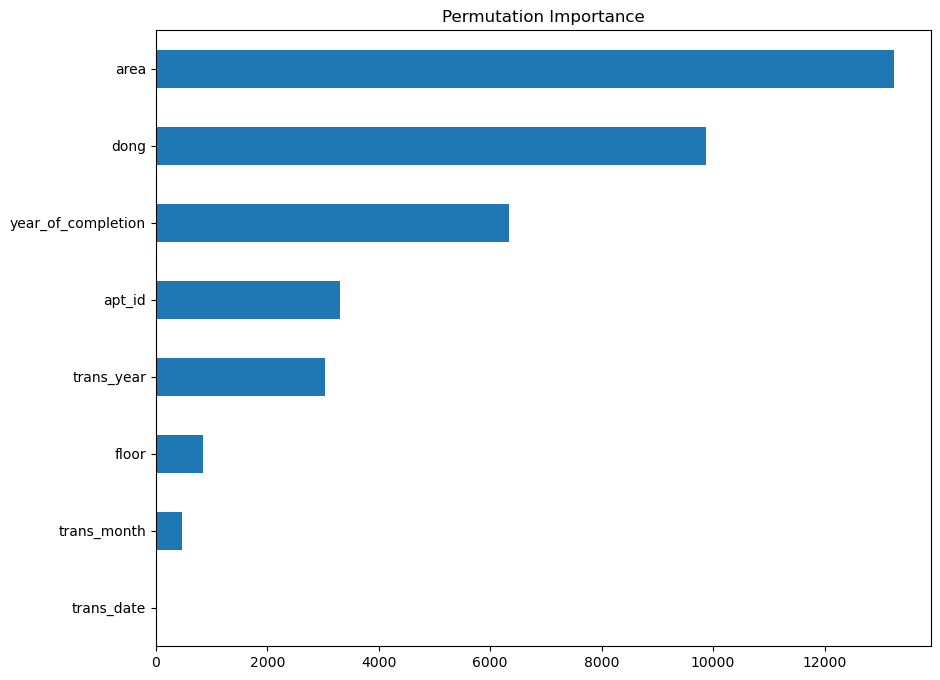

In [41]:
import seaborn as sns

feature_names = x_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()


plt.figure(figsize=(10,8))
pi.plot.barh()
plt.title("Permutation Importance")

## PDP

(<Figure size 1500x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_ax': {'_pdp_ax': <Axes: >,
   '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='dong'>}})

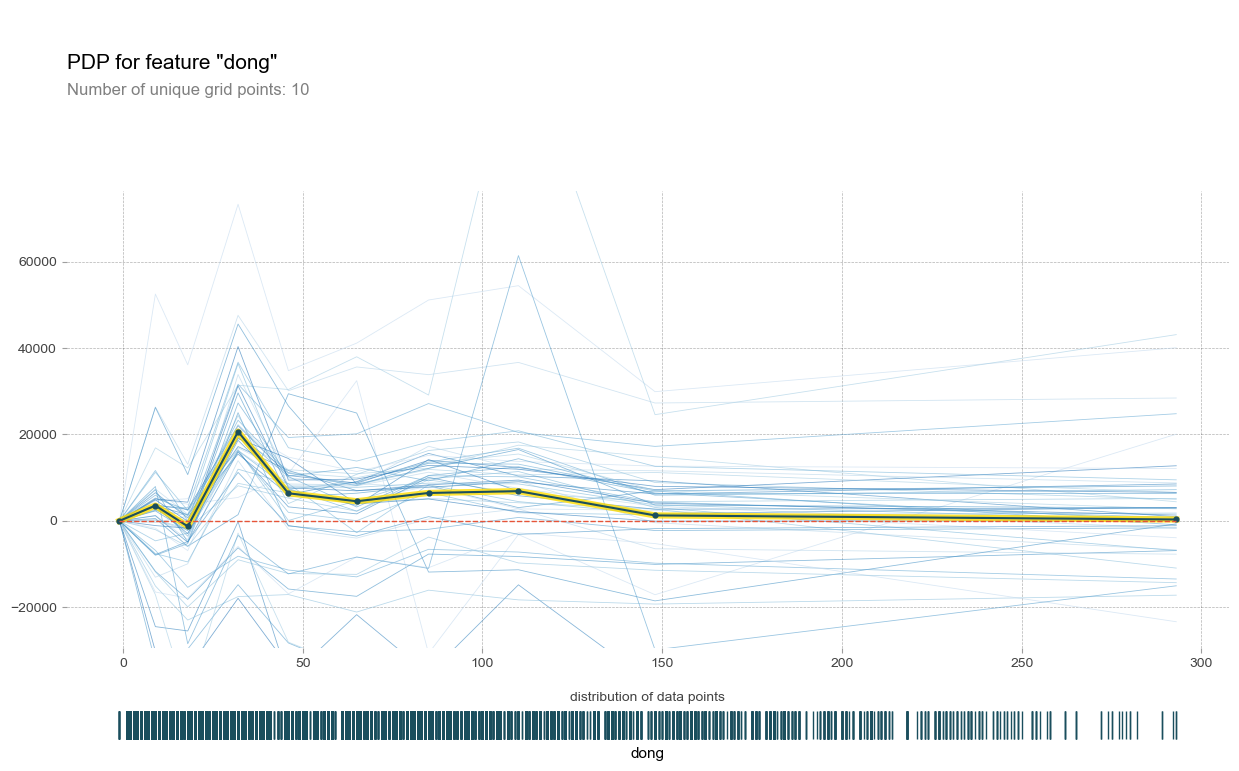

In [42]:
# 지역에 따른 실거래가 변화

bb = model[0].transform(x_test)
target_feature = 'dong'

isolated = pdp_isolate(
    model=model[1],
    dataset=x_test_encoded,
    model_features=x_test.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10, 
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # 전체 데이터 갯수 중 plotting할 데이터 수의 비율
    plot_pts_dist=True,
)

In [67]:
# 20~50번대 동 인코딩값 확인
pd.DataFrame(model[0].mapping[0]['mapping'])[19:46]

,0
등촌동,20
쌍문동,21
방이동,22
상도동,23
성수동1가,24
천호동,25
역삼동,26
문정동,27
오금동,28
목동,29


(<Figure size 1500x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_ax': {'_pdp_ax': <Axes: >,
   '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='trans_year'>}})

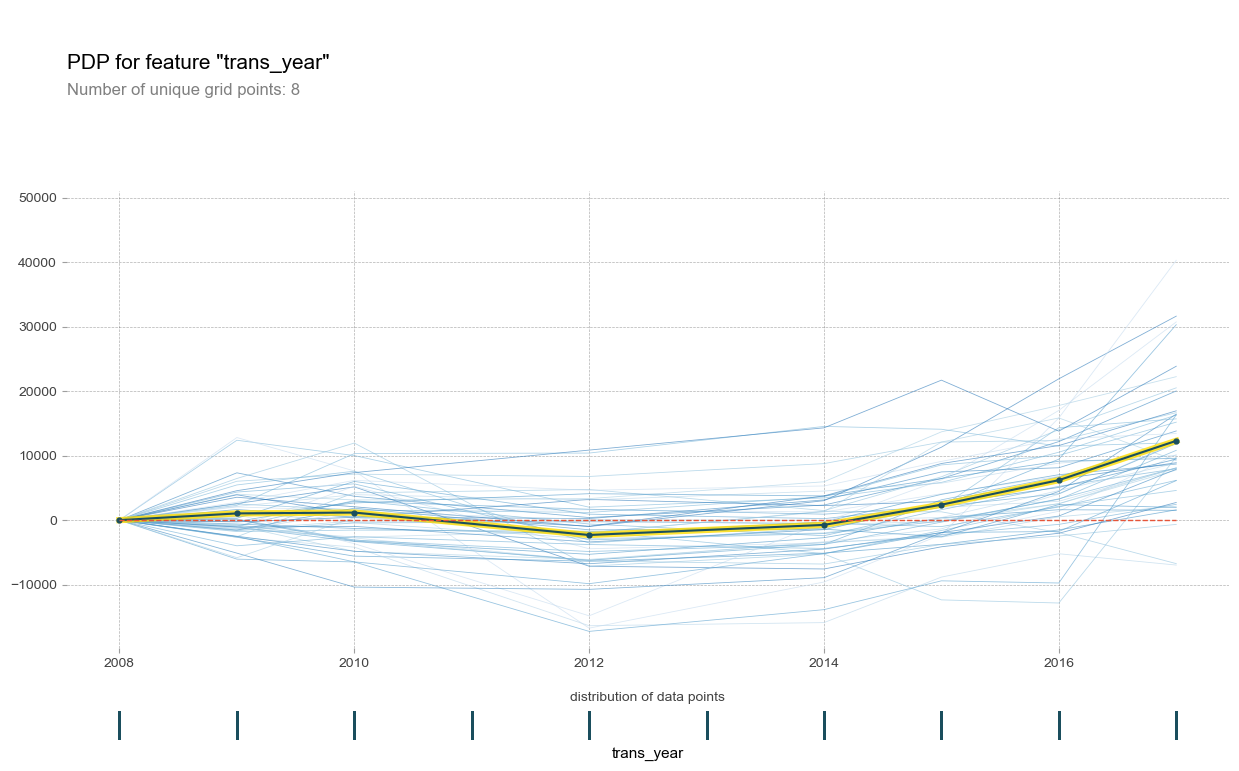

In [68]:

target_feature = 'trans_year'

isolated = pdp_isolate(
    model=model[1],
    dataset=x_test_encoded,
    model_features=x_test.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10, 
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # 전체 데이터 갯수 중 plotting할 데이터 수의 비율
    plot_pts_dist=True,
)

(<Figure size 1500x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_ax': {'_pdp_ax': <Axes: >,
   '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='trans_month'>}})

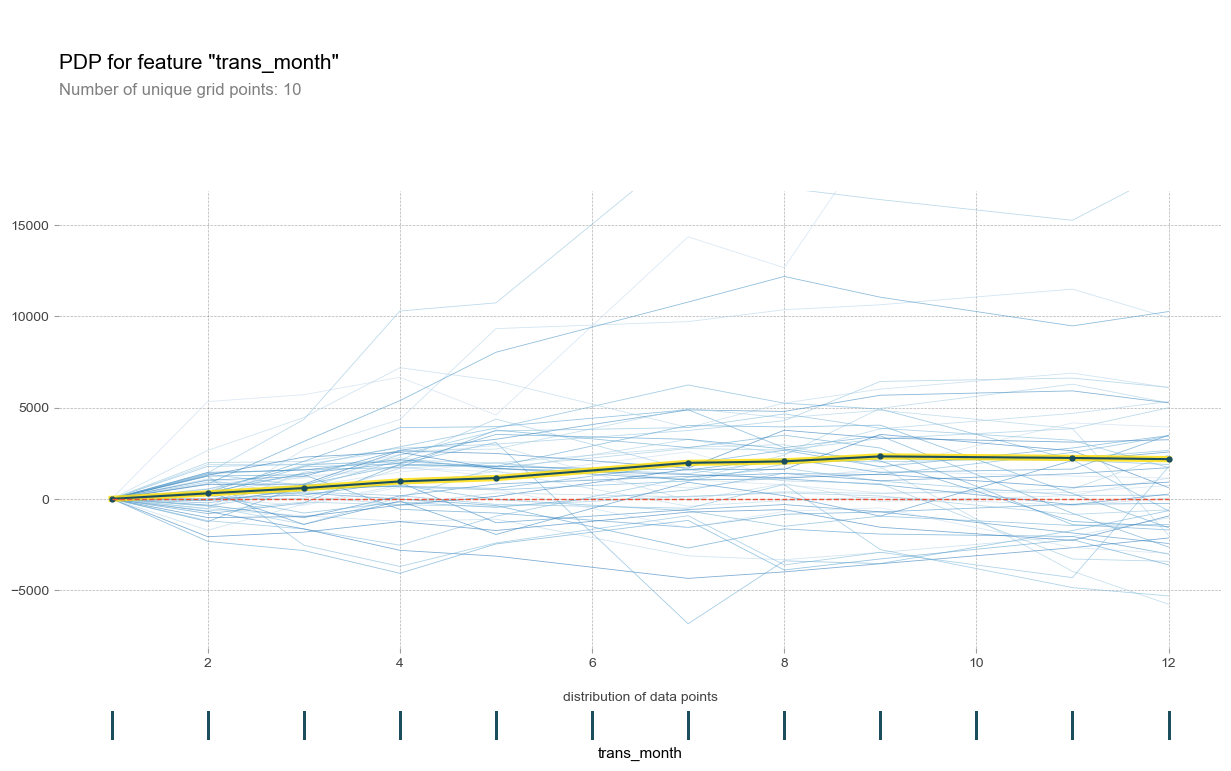

In [69]:

target_feature = 'trans_month'

isolated = pdp_isolate(
    model=model[1],
    dataset=x_test_encoded,
    model_features=x_test.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10, 
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # 전체 데이터 갯수 중 plotting할 데이터 수의 비율
    plot_pts_dist=True,
)

(<Figure size 1500x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_ax': {'_pdp_ax': <Axes: >,
   '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='floor'>}})

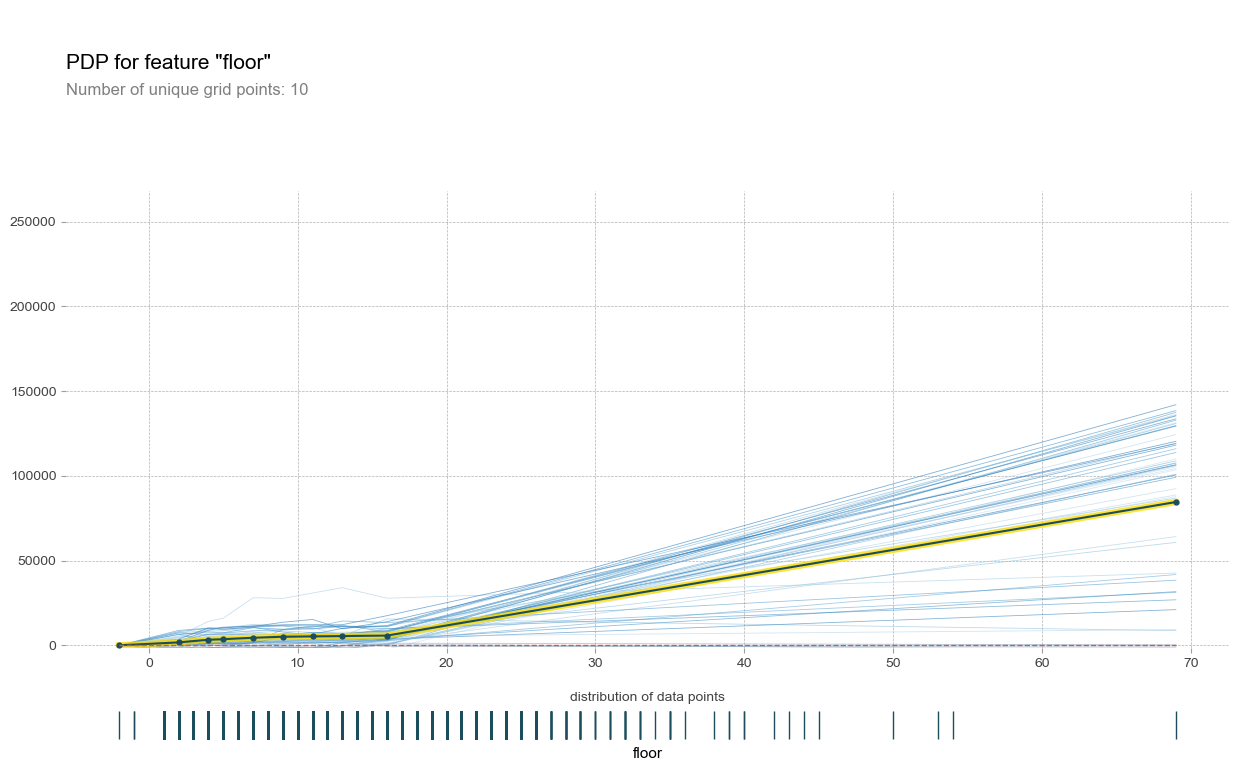

In [70]:

target_feature = 'floor'

isolated = pdp_isolate(
    model=model[1],
    dataset=x_test_encoded,
    model_features=x_test.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10, 
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # 전체 데이터 갯수 중 plotting할 데이터 수의 비율
    plot_pts_dist=True,
)